<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Peter\AppData\Local\Temp\ipykernel_66124\383232895.py:7: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("C:\\Users\\Peter\\OneDrive - University of Edinburgh\\Desktop\\PHD\\github\\DEM_test\\Ageng_based_simulation\\Chraibi_God_like_Code\Data\\traj_133_av0.00_v01.00_tau1.00.txt", sep='\s+', header=None, names=['id', 'time', 'x', 'v'], skiprows=1)
C:\Users\Peter\AppData\Local\Temp\ipykernel_66124\383232895.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("C:\\Users\\Peter\\OneDrive - University of Edinburgh\\Desktop\\PHD\\github\\DEM_test\\Ageng_based_simulation\\Chraibi_God_like_Code\Data\\traj_133_av0.00_v01.00_tau1.00.txt", sep='\s+', header=None, names=['id', 'time', 'x', 'v'], skiprows=1)


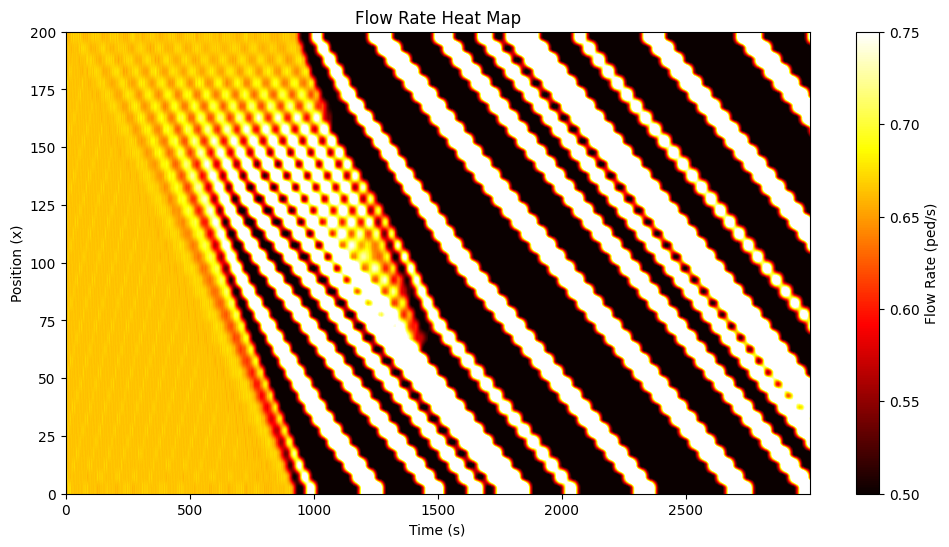

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Replace 'your_file.txt' with the actual path to your data file
data = pd.read_csv("C:\\Users\\Peter\\OneDrive - University of Edinburgh\\Desktop\\PHD\\github\\DEM_test\\Ageng_based_simulation\\Chraibi_God_like_Code\Data\\traj_133_av0.00_v01.00_tau1.00.txt", sep='\s+', header=None, names=['id', 'time', 'x', 'v'], skiprows=1)
# Apply modulo 200 to the position to account for periodic boundary conditions
data['x'] = data['x'] % 200

# Define the number of areas to divide the space into
num_areas = 40
area_length = 200 / num_areas

# Create time intervals (assuming regular time steps)
time_intervals = sorted(data['time'].unique())
dt = time_intervals[1] - time_intervals[0]  # Assuming regular time intervals

# Create a matrix to store flow rate for each area and time interval
flow_rate_matrix = np.zeros((len(time_intervals), num_areas))

# Calculate flow rate for each time interval and area
for t_idx, time in enumerate(time_intervals[:-1]):
    # Filter data for the current and next time steps
    current_time_data = data[data['time'] == time]
    next_time_data = data[data['time'] == time_intervals[t_idx + 1]]
    
    # Count agents in each area at current and next time steps
    for area_idx in range(num_areas):
        # Define the boundaries of the current area
        area_start = area_idx * area_length
        area_end = (area_idx + 1) * area_length
        
        # Count agents in the current area at current time
        N_current = current_time_data[(current_time_data['x'] >= area_start) & 
                                      (current_time_data['x'] < area_end)].shape[0]
        
        # Count agents in the current area at next time
        N_next = next_time_data[(next_time_data['x'] >= area_start) & 
                                (next_time_data['x'] < area_end)].shape[0]
        
        # Calculate the flow rate using the formula: (N(t) + N(t+dt)) / (2 * d)
        flow_rate = (N_current + N_next) / (2 * area_length)
        
        # print(flow_rate)
        
        # Store the flow rate in the matrix
        flow_rate_matrix[t_idx, area_idx] = flow_rate

# Plot the heat map
plt.figure(figsize=(12, 6))
plt.imshow(flow_rate_matrix.T, aspect='auto', cmap='hot', origin='lower',
           extent=[0, max(time_intervals), 0, 200], vmin = 0.5, vmax = 0.75)
plt.colorbar(label='Flow Rate (ped/s)')
plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.title('Flow Rate Heat Map')
plt.show()
